In [1]:
import numpy as np
import os
import pickle

In [2]:
current_path = os.getcwd()
save_path = os.path.join(current_path, 'results_exp_grid')
save_path_ipopt = os.path.join(current_path, 'results_exp_ipopt')

In [3]:
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [4]:
import matplotlib.pyplot as plt
# row 2 col 3
def subplot_drawing_n_3(revenue_list, total_surplus_list, surplus_list, price_list, access_list, market=None):
  fig, axs = plt.subplots(2, 3, figsize=(12, 7), constrained_layout=True, gridspec_kw={'hspace': 0.5})
  n_iter = len(revenue_list)
  iter_list = [i/(n_iter-1) for i in range(n_iter)] if n_iter != 1 else [0]
  axs[0,0].plot(iter_list, revenue_list, color='r', label = r'$\mathcal{R}(\alpha)$', linewidth=3.0)
  axs[0,0].plot(iter_list, total_surplus_list, color='g', label = r'$\mathcal{S}(\alpha)$', linewidth=3.0)
  axs[0,0].plot(iter_list, [revenue_list[i] + total_surplus_list[i] for i in range(n_iter)], color='b', label = r'$\mathcal{W}(\alpha)$', linewidth=3.0)

  level = 0.8
  c = ['#069AF3', '#0343DF', '#FFA500', '#FF4500', '#15B01A', '#006400']
  index = [(1,2), (1,3), (2,1), (2,3), (3,1), (3,2)]
  for i in range(6):
    axs[0,1].plot(iter_list, [p[index[i]] for p in price_list], label=r'$p_{%s}$' %str(index[i])[1:-1], linewidth=3.0, color=c[i], alpha=level)

  axs[0,2].plot(iter_list, [(market[1,2] * p[1,2] + p[1,3] * market[1,3])/(market[1,2]+market[1,3]) for p in price_list], label=r'$\bar{p}_1$', linewidth=3.0, color='b', alpha=level)
  axs[0,2].plot(iter_list, [(market[2,1] * p[2,1] + p[2,3] * market[2,3])/(market[2,1]+market[2,3]) for p in price_list], label=r'$\bar{p}_2$', linewidth=3.0, color='r', alpha=level)
  axs[0,2].plot(iter_list, [(market[3,1] * p[3,1] + p[3,2] * market[3,2])/(market[3,1]+market[3,2]) for p in price_list], label=r'$\bar{p}_3$', linewidth=3.0, color='g', alpha=level)

  for i in range(6):
    axs[1,1].plot(iter_list, [a[index[i]] for a in access_list], label=r'$A_{%s}$' %str(index[i])[1:-1], linewidth=3.0, color=c[i], alpha=level)

  axs[1,2].plot(iter_list, [(market[1,2] * a[1,2] + a[1,3] * market[1,3])/(market[1,2]+market[1,3]) for a in access_list], label=r'$\bar{A}_1$', linewidth=3.0, color='b', alpha=level)
  axs[1,2].plot(iter_list, [(market[2,1] * a[2,1] + a[2,3] * market[2,3])/(market[2,1]+market[2,3]) for a in access_list], label=r'$\bar{A}_2$', linewidth=3.0, color='r', alpha=level)
  axs[1,2].plot(iter_list, [(market[3,1] * a[3,1] + a[3,2] * market[3,2])/(market[3,1]+market[3,2]) for a in access_list], label=r'$\bar{A}_3$', linewidth=3.0, color='g', alpha=level)

  for i in range(6):
    axs[1,0].plot(iter_list, [s[index[i]] for s in surplus_list], label=r'$\mathcal{S}_{%s}$' %str(index[i])[1:-1], linewidth=3.0, color=c[i], alpha=level)

  for i in range(2):
    for j in range(3):
      axs[i,j].set_xlim([0, 1])
      axs[i,j].grid()

  for i in range(2):
    for j in range(3):
      box = axs[i,j].get_position()
      axs[i,j].set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
      if (i,j) in [(0,0), (0,2), (1,2)]: # 1 row
        axs[i,j].legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), fancybox=True, shadow=True, ncol=3, prop={"size":10})
      else:
        axs[i,j].legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), fancybox=True, shadow=True, ncol=3, prop={"size":10})

  for ax in axs.flat:
      ax.set(xlabel=r'$\alpha$')
      ax.xaxis.label.set_fontsize(18) #28

  plt.show()

In [112]:
def subplot_drawing_n_3_v2(revenue_list, total_surplus_list, surplus_list, price_list, access_list, criteria='trip', market=None):
    fig, axs = plt.subplots(1, 4, figsize=(16, 3.5), constrained_layout=True, gridspec_kw={'hspace': 0.5})
    n_iter = len(revenue_list)
    iter_list = [i/(n_iter-1) for i in range(n_iter)] if n_iter != 1 else [0]
    axs[0].plot(iter_list, revenue_list, color='r', label = r'$\mathcal{R}(\alpha)$', linewidth=3.0)
    axs[0].plot(iter_list, total_surplus_list, color='g', label = r'$\mathcal{S}(\alpha)$', linewidth=3.0)
    axs[0].plot(iter_list, [revenue_list[i] + total_surplus_list[i] for i in range(n_iter)], color='b', label = r'$\mathcal{W}(\alpha)$', linewidth=3.0)


    level = 0.8
    c = ['#069AF3', '#0343DF', '#FFA500', '#FF4500', '#15B01A', '#006400']
    index = [(1,2), (1,3), (2,1), (2,3), (3,1), (3,2)]

    for i in range(6):
        axs[1].plot(iter_list, [s[index[i]] for s in surplus_list], label=r'$\mathcal{S}_{%s}$' %str(index[i])[1:-1], linewidth=3.0, color=c[i], alpha=level)

    if criteria == 'origin':
        axs[2].plot(iter_list, [(market[1,2] * p[1,2] + p[1,3] * market[1,3])/(market[1,2]+market[1,3]) for p in price_list], label=r'$\bar{p}_1$', linewidth=3.0, color='b', alpha=level)
        axs[2].plot(iter_list, [(market[2,1] * p[2,1] + p[2,3] * market[2,3])/(market[2,1]+market[2,3]) for p in price_list], label=r'$\bar{p}_2$', linewidth=3.0, color='r', alpha=level)
        axs[2].plot(iter_list, [(market[3,1] * p[3,1] + p[3,2] * market[3,2])/(market[3,1]+market[3,2]) for p in price_list], label=r'$\bar{p}_3$', linewidth=3.0, color='g', alpha=level)

        axs[3].plot(iter_list, [(market[1,2] * a[1,2] + a[1,3] * market[1,3])/(market[1,2]+market[1,3]) for a in access_list], label=r'$\bar{A}_1$', linewidth=3.0, color='b', alpha=level)
        axs[3].plot(iter_list, [(market[2,1] * a[2,1] + a[2,3] * market[2,3])/(market[2,1]+market[2,3]) for a in access_list], label=r'$\bar{A}_2$', linewidth=3.0, color='r', alpha=level)
        axs[3].plot(iter_list, [(market[3,1] * a[3,1] + a[3,2] * market[3,2])/(market[3,1]+market[3,2]) for a in access_list], label=r'$\bar{A}_3$', linewidth=3.0, color='g', alpha=level)
    else:
        for i in range(6):
            axs[2].plot(iter_list, [p[index[i]] for p in price_list], label=r'$p_{%s}$' %str(index[i])[1:-1], linewidth=3.0, color=c[i], alpha=level)
        for i in range(6):
            axs[3].plot(iter_list, [a[index[i]] for a in access_list], label=r'$A_{%s}$' %str(index[i])[1:-1], linewidth=3.0, color=c[i], alpha=level)

    for j in range(4):
        axs[j].set_xlim([0, 1])
        axs[j].grid()


    for j in range(4):
        box = axs[j].get_position()
        axs[j].set_position([box.x0, box.y0 + box.height * 0.05, box.width, box.height * 0.75])

        if j == 0 or (j in [2,3] and criteria =='origin'):
            axs[j].legend(loc='upper center', bbox_to_anchor=(0.5, 1.23), fancybox=True, shadow=True, ncol=3, prop={"size":10})
        else:
            axs[j].legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), fancybox=True, shadow=True, ncol=3, prop={"size":10})

    for ax in axs.flat:
      ax.set(xlabel=r'$\alpha$')
      ax.xaxis.label.set_fontsize(18) #28

    plt.show()

In [5]:
# Parameters
n = 3 # location
m = 10

L = [i for i in range(1,n+1)]
d = {(i,j): 1 for i in L for j in L}
market ={(1, 2): 4, (1, 3): 5, (2, 1): 5, (2, 3): 8, (3, 1): 10, (3, 2): 2, (1, 1): 0, (2, 2): 0, (3, 3): 0}
b ={(1, 1): 1, (1, 2): 1/7, (1, 3): 1/5, (2, 1): 1, (2, 2): 1, (2, 3): 1/5, (3, 1): 1/8, (3, 2): 1/6, (3, 3): 1}
param = {'market': market, 'b': b, 'n': n, 'm': m, 'd': d}

In [6]:
def buzens_algorithm(N, M, r):
    max_r = max(r)
    r = [ri/max_r for ri in r]
    C = [1] + [0 for _ in range(M)]
    r = [None] + r
    for n in range(1, N+1):
      for m in range(1, M+1):
        C[m] = C[m] + r[n] * C[m-1]
    return r[N] * C[M-1]/C[M]

def get_pi(N, M, r):
    if sum(r) == 0:
        return {1:0, 2:0, 3:0}
    pi = {}
    for loc in range(len(r)):
        r_i = r[0:loc] + r[loc+1:] + [r[loc]]
        pi[loc+1] = buzens_algorithm(N, M, r_i)
    return pi

def get_r(q):
    if sum(q.values()) == 0:
        r = [0, 0, 0]
    elif q[1,2] + q[1,3] == 0:
        if q[2,1] + q[3,1] != 0:
            return 'continue'
        else:
            l2 = market[2,3] * q[2,3]
            l3 = market[3,2] * q[3,2]
            r = [0, l3/(l2+l3), l2/(l2+l3)]
    elif q[2,1] + q[2,3] == 0:
        if q[1,2] + q[3,2] != 0:
            return 'continue'
        else:
            l1 = market[1,3] * q[1,3]
            l3 = market[3,1] * q[3,1]
            r = [l3/(l1+l3), 0, l1/(l1+l3)]
    elif q[3,1] + q[3,2] == 0:
        if q[1,3] + q[2,3] != 0:
            return 'continue'
        else:
            l1 = market[1,2] * q[1,2]
            l2 = market[2,1] * q[2,1]
            r = [l2/(l1+l2), l1/(l1+l2), 0]
    else:
        A = market[2,1]*q[2,1]/(market[1,2]*q[1,2]+market[1,3]*q[1,3])
        B = market[3,1]*q[3,1]/(market[1,2]*q[1,2]+market[1,3]*q[1,3])
        C = market[1,2]*q[1,2]/(market[2,1]*q[2,1]+market[2,3]*q[2,3])
        D = market[3,2]*q[3,2]/(market[2,1]*q[2,1]+market[2,3]*q[2,3])

        if C*A == 1:
            r = [0, 0, 1]
        else:
            r2_r3 = (C*B+D)/(1-C*A)
            r1_r3 = A*(C*B+D)/(1-C*A)+B
            z = 1 + r2_r3 + r2_r3
            r = [r1_r3/z, r2_r3/z, 1/z]
    return r

In [7]:
def fair_model(init, param, fairness, criteria, alpha, star_dict, grid, opt_q):
    market, b, n, m = param['market'], param['b'], param['n'], param['m']
    L = [i for i in range(1, n + 1)]

    if opt_q == None: # if the solution is not provided by ipopt
        opt_rev, opt_total_surplus = 0, 0
        opt_access = {(i,j): 0 for i in L for j in L}
        opt_price = {(i,j): 0 for i in L for j in L}
        opt_sur = {(i,j): 0 for i in L for j in L}
        opt_q = {(i,j): 0 for i in L for j in L}
    else:
        r = get_r(opt_q)
        pi = get_pi(n, m, r)
        opt_sur, opt_access, opt_price, opt_total_surplus = {}, {}, {}, 0
        for i in L:
            for j in L:
                if i != j:
                    opt_price[i,j] = -np.log(max(opt_q[i,j], 1e-23))/b[i,j] if opt_q[i,j] != 0 else 1e23 #np.inf
                    opt_sur[i,j] = opt_q[i,j] * pi[i] / b[i,j]
                    opt_access[i,j] = opt_q[i,j] * pi[i]
                    opt_total_surplus += market[i,j] * opt_sur[i,j]
        opt_rev = sum([opt_price[i,j]*market[i,j]*opt_q[i,j]*pi[i] for i in L for j in L if i != j])

    # grid search
    updated = False
    eps = 1e-3 if alpha==1 else 0
    for q_12 in np.linspace(init[1,2][0], init[1,2][1], num=grid):
        for q_13 in np.linspace(init[1,3][0], init[1,3][1], num=grid):
            for q_21 in np.linspace(init[2,1][0], init[2,1][1], num=grid):
                for q_23 in np.linspace(init[2,3][0], init[2,3][1], num=grid):
                    for q_31 in np.linspace(init[3,1][0], init[3,1][1], num=grid):
                        for q_32 in np.linspace(init[3,2][0], init[3,2][1], num=grid):
                            q = {(1,2): q_12, (1,3): q_13, (2,1): q_21, (2,3): q_23, (3,1): q_31, (3,2): q_32}
                            if sum(q.values()) == 0:
                                continue

                            # ignore trips that share the same origin and destination
                            q[1,1] = 0
                            q[2,2] = 0
                            q[3,3] = 0

                            r = get_r(q)
                            if r == 'continue':
                                continue
                            pi = get_pi(n, m, r)

                            if alpha != 0:
                                if fairness == 'Price':
                                    price = {}
                                    for i in L:
                                        for j in L:
                                            if i != j:
                                                price[i,j] = -np.log(q[i,j])/b[i,j] if q[i,j] != 0 else -np.log(1e-23)/b[i,j]

                                    if criteria == 'trip':
                                        p_gap = max(price.values()) - min(price.values())
                                    elif criteria == 'origin':
                                        weighted_p = []
                                        for i in L:
                                            weighted_p.append(sum([market[i,j] * price[i,j] for j in L if i != j])/sum([market[i,j] for j in L if i != j]))
                                        p_gap = max(weighted_p) - min(weighted_p)
                                    if p_gap > (1-alpha)*star_dict[criteria]['p'] + eps:
                                        continue

                                if fairness == 'Access':
                                    access = {}
                                    for i in L:
                                        for j in L:
                                            if i != j:
                                                access[i,j] = q[i,j] * pi[i]

                                    if criteria == 'trip':
                                        a_gap = max(access.values()) - min(access.values())
                                    elif criteria == 'origin':
                                        weighted_a = []
                                        for i in L:
                                            weighted_a.append(sum([market[i,j] * access[i,j] for j in L if i != j])/sum([market[i,j] for j in L if i != j]))
                                        a_gap = max(weighted_a) - min(weighted_a)
                                    if a_gap > (1-alpha)*star_dict[criteria]['a'] + eps:
                                        continue

                            revenue = sum([-np.log(max(q[i,j], 1e-23))/b[i,j]*market[i,j]*q[i,j]*pi[i] for i in L for j in L if i != j])

                            if revenue > opt_rev:
                                opt_rev = revenue
                                sur, access, price, total_surplus = {}, {}, {}, 0
                                for i in L:
                                    for j in L:
                                        if i != j:
                                            price[i,j] = -np.log(q[i,j])/b[i,j] if q[i,j] != 0 else -np.log(1e-23)/b[i,j]
                                            sur[i,j] = q[i,j] * pi[i] / b[i,j]
                                            access[i,j] = q[i,j] * pi[i]
                                            total_surplus += market[i,j] * sur[i,j]

                                opt_price = price
                                opt_access = access
                                opt_q = q
                                opt_sur = sur
                                opt_total_surplus = total_surplus
                                updated = True

    if updated == False:
        print("Grid search < ipopt")
    return opt_rev, opt_price, opt_access, opt_q, {'s': opt_sur, 'ts': opt_total_surplus}

In [8]:
def perfect_fair_model(init, param, fairness, criteria, grid, opt_q = None):
    market, b, n, m = param['market'], param['b'], param['n'], param['m']
    L = [i for i in range(1, n + 1)]

    if opt_q == None:
        opt_rev, opt_total_surplus = 0, 0
        opt_q = {(i,j): 0 for i in L for j in L}
    else:
        r = get_r(opt_q)
        pi = get_pi(n, m, r)
        opt_rev = sum([-np.log(max(opt_q[i,j], 1e-23))/b[i,j]*market[i,j]*opt_q[i,j]*pi[i] for i in L for j in L if i != j])

    updated = False
    if fairness == 'Price':
        if criteria == 'trip':
            for q_12 in np.linspace(init[1,2][0], init[1,2][1], num=grid):
                if q_12 == 0:
                    continue
                q = {(i,j): np.exp(b[i,j]/b[1,2] * np.log(q_12)) if i != j else 0 for i in L for j in L}
                if any(q>1 for q in q.values()):
                    continue

                r = get_r(q)
                pi = get_pi(n, m, r)
                rev = sum([-np.log(max(q[i,j], 1e-23))/b[i,j]*market[i,j]*q[i,j]*pi[i] for i in L for j in L if i != j])

                if rev > opt_rev:
                    opt_rev = rev
                    opt_q = q
                    updated = True

                price = {}
                for i in L:
                    for j in L:
                        if i != j:
                            price[i,j] = int(-np.log(opt_q[i,j])/b[i,j]*1000)/1000 # admit small error
                assert price[1,2] == price[1,3] == price[2,1] == price[2,3] == price[3,1] == price[3,2], price

        elif criteria == 'origin':
            for q_12 in np.linspace(init[1,2][0], init[1,2][1], num=grid):
                for q_13 in np.linspace(init[1,3][0], init[1,3][1], num=grid):
                    for q_21 in np.linspace(init[2,1][0], init[2,1][1], num=grid):
                        for q_31 in np.linspace(init[3,1][0], init[3,1][1], num=grid):

                            p_1 = -market[1,2] * np.log(max(q_12, 1e-23))/b[1,2] -market[1,3] * np.log(max(q_13, 1e-23))/b[1,3]

                            p_21 = -1/b[2,1]*np.log(max(q_21, 1e-23))
                            p_23 = (p_1 * (market[2,1] + market[2,3]) - market[2,1] * p_21)/market[2,3]
                            q_23 = -1/b[2,3]*np.log(max(p_23, 1e-23))
                            if q_23 > 1 or q_23 < 0:
                                continue

                            p_31 = -1/b[3,1]*q_31
                            p_32 = (p_1 * (market[3,1] + market[3,2]) - market[3,1] * p_31)/market[3,2]
                            q_32 = -1/b[3,2]*p_32
                            if q_32 > 1 or q_32 < 0:
                                continue

                            q = {(1,2): q_12, (1,3): q_13, (2,1): q_21, (2,3): q_23, (3,1): q_31, (3,2): q_32}

                            r = get_r(q)
                            pi = get_pi(n, m, r)
                            rev = sum([-np.log(max(q[i,j], 1e-23))/b[i,j]*market[i,j]*q[i,j]*pi[i] for i in L for j in L if i != j])

                            if rev > opt_rev:
                                opt_rev = rev
                                opt_q = q
                                updated = True

                            price = {}
                            for i in L:
                                p_sum = sum([market[i,j]*-np.log(opt_q[i,j])/b[i,j] for j in L if i != j])
                                price[i] = int(p_sum/sum([market[i,j] for j in L if i != j])*1000)/1000
                            assert price[1] == price[2] == price[3], price

        else:
            print("Please specify the criteria")

    elif fairness == 'Access':
        if criteria == 'trip':
            if opt_rev > 1e-4:
                print('Non-sense')
        elif criteria == 'origin':
            for q_12 in np.linspace(init[1,2][0], init[1,2][1], num=grid):
                for q_13 in np.linspace(init[1,3][0], init[1,3][1], num=grid):
                    for q_21 in np.linspace(init[2,1][0], init[2,1][1], num=grid):
                        for q_23 in np.linspace(init[2,3][0], init[2,3][1], num=grid):
                            for q_31 in np.linspace(init[3,1][0], init[3,1][1], num=grid):
                                for q_32 in np.linspace(init[3,2][0], init[3,2][1], num=grid):
                                    q = {(1,2): q_12, (1,3): q_13, (2,1): q_21, (2,3): q_23, (3,1): q_31, (3,2): q_32}
                                    if sum(q.values()) == 0:
                                        continue
                                    q[1,1] = 0
                                    q[2,2] = 0
                                    q[3,3] = 0

                                    r = get_r(q)
                                    if r == 'continue':
                                        continue
                                    pi = get_pi(n, m, r)

                                    A = {i: pi[i]*sum([market[i,j]*q[i,j] for j in L if i != j])/sum([market[i,j] for j in L if i != j]) for i in L}

                                    eps = 1e-10
                                    if np.abs(A[1]-A[2]) < eps and np.abs(A[2]-A[3]) < eps and np.abs(A[1]-A[3]) < eps:
                                        rev = sum([-np.log(max(q[i,j], 1e-23))/b[i,j]*market[i,j]*q[i,j]*pi[i] for i in L for j in L if i != j])
                                        if rev > opt_rev:
                                            opt_q = q
                                            opt_rev = rev
            updated = True
    else:
        print("The fairness variable should be either Price or Access")

    sur, access, price, total_surplus = {}, {}, {}, 0
    r = get_r(opt_q)
    pi = get_pi(n, m, r)
    for i in L:
        for j in L:
            if i != j:
                price[i,j] =-np.log(opt_q[i,j])/b[i,j] if opt_q[i,j] != 0 else 1e23 #np.inf
                sur[i,j] = opt_q[i,j] * pi[i] / b[i,j]
                access[i,j] = opt_q[i,j] * pi[i]
                total_surplus += market[i,j] * sur[i,j]

    opt_price = price
    opt_access = access
    opt_sur = sur
    opt_total_surplus = total_surplus

    if updated == False:
        print("Grid search < ipopt")
    return opt_rev, opt_price, opt_access, opt_q, {'s': opt_sur, 'ts': opt_total_surplus}

In [9]:
def star_calculator(market, opt_price, opt_access):
    star_dict = {}
    for criteria in ['origin', 'trip']:
      if criteria == 'origin':
        weighted_p = []
        weighted_a = []
        for i in L:
          weighted_p.append(sum([market[i,j] * opt_price[i,j] for j in L if i != j])/sum([market[i,j] for j in L if i != j]))
          weighted_a.append(sum([market[i,j] * opt_access[i,j] for j in L if i != j])/sum([market[i,j] for j in L if i != j]))
        p_star = max(weighted_p) - min(weighted_p)
        a_star = max(weighted_a) - min(weighted_a)
      elif criteria == 'trip':
        p_star = max(opt_price.values()) - min(opt_price.values())
        a_star = max(opt_access.values()) - min(opt_access.values())
      star = {'p': p_star, 'a': a_star}
      star_dict[criteria] = star
    return star_dict

### Nested Grid Search

In [10]:
def nested_grid_search(param, fairness, criteria, alpha, star_dict, file_ipopt=None, file_alg=None):
    if file_ipopt != None:
        with open(file_ipopt, 'rb') as f:
            result = pickle.load(f)
        opt_q = result['opt']['q'][int(alpha*10)]
        rev_opt = result['opt']['rev'][int(alpha*10)]
    else:
        opt_q = None

    if file_alg != None:
        with open(file_alg, 'rb') as f:
            result = pickle.load(f)
        if opt_q == None:
            opt_q = result['org_q']
        else:
            rev_alg = result['rev']
            if rev_alg > rev_opt:
                opt_q = result['org_q']

    grid_1 = 10
    init = {(i,j): [0,1] for i in range(1,n+1) for j in range(1,n+1) if i != j}

    if alpha == 1:
        rev, opt_price, opt_access, org_q, sur_dict = perfect_fair_model(init, param, fairness, criteria, grid_1+1, opt_q)
    else:
        rev, opt_price, opt_access, org_q, sur_dict = fair_model(init, param, fairness, criteria, alpha, star_dict, grid_1+1, opt_q)

    print('rev at first round', rev)

    ###########################################################################
    grid_2 = 10
    for key in org_q.keys():
        init[key] = [max(org_q[key]-1/(2*grid_1), 0), min(org_q[key]+1/(2*grid_1), 1)]

    if alpha == 1:
        rev_2, opt_price_2, opt_access_2, org_q_2, sur_dict_2 = perfect_fair_model(init, param, fairness, criteria, grid_1+1, opt_q)
    else:
        rev_2, opt_price_2, opt_access_2, org_q_2, sur_dict_2 = fair_model(init, param, fairness, criteria, alpha, star_dict, grid_2+1, opt_q)

    if rev_2 > rev:
        rev, opt_price, opt_access, org_q, sur_dict = rev_2, opt_price_2, opt_access_2, org_q_2, sur_dict_2

    print('rev at second round', rev)

    ###########################################################################
    grid_3 = 10
    for key in org_q.keys():
        init[key] = [max(org_q[key]-1/(2*grid_1*grid_2), 0), min(org_q[key]+1/(2*grid_1*grid_2), 1)]

    if alpha == 1:
        rev_3, opt_price_3, opt_access_3, org_q_3, sur_dict_3 = perfect_fair_model(init, param, fairness, criteria, grid_1+1, opt_q)
    else:
        rev_3, opt_price_3, opt_access_3, org_q_3, sur_dict_3 = fair_model(init, param, fairness, criteria, alpha, star_dict, grid_3+1, opt_q)

    if rev_3 > rev:
        rev, opt_price, opt_access, org_q, sur_dict = rev_2, opt_price_2, opt_access_2, org_q_2, sur_dict_2

    print('rev at third round', rev)

    if alpha != 0:
        return rev, opt_price, opt_access, org_q, sur_dict
    else:
        star_dict = star_calculator(param['market'], opt_price, opt_access)
        return rev, opt_price, opt_access, org_q, sur_dict, star_dict

In [11]:
def running_alg(param, fairness, criteria, alpha_list=[i/10 for i in range(11)]):

    ### alpha = 0?
    if 0 not in alpha_list:
        with open(os.path.join(save_path, 'Opt.pkl'), 'rb') as f:
            result = pickle.load(f)
        opt_price, opt_access = result['opt_price'], result['opt_access']
        star_dict = star_calculator(param['market'], opt_price, opt_access)
        revenue_list, surplus_list, total_surplus_list, p_list, a_list, q_list = [], [], [], [], [], []
        alpha_list = alpha_list[::-1]
    else:
        star_dict = 0
        rev, opt_price, opt_access, org_q, sur_dict, star_dict = nested_grid_search(param, fairness, criteria, 0, star_dict, file_ipopt = os.path.join(save_path_ipopt, f'{fairness}_{criteria}.pkl'))
        file_name = 'Opt.pkl'
        with open(os.path.join(save_path, file_name), 'wb') as f:
            pickle.dump({'rev': rev, 'opt_price': opt_price, 'opt_access': opt_access, "org_q": org_q, 'sur_dict': sur_dict}, f)

        revenue_list = [rev]
        surplus_list= [sur_dict['s']]
        total_surplus_list = [sur_dict['ts']]
        p_list = [opt_price]
        q_list = [org_q]
        a_list = [opt_access]
        alpha_list = alpha_list[1:][::-1]

    for i in range(len(alpha_list)):
        alpha = alpha_list[i]
        print(f"alpah: {alpha}")

        file_ipopt = os.path.join(save_path_ipopt, f'{fairness}_{criteria}.pkl')
        file_alg = os.path.join(save_path, f'{fairness}_{criteria}_{alpha_list[i-1]}.pkl') if i != 0 else None
        rev, opt_price, opt_access, org_q, sur_dict = nested_grid_search(param, fairness, criteria, alpha, star_dict, file_ipopt = file_ipopt, file_alg = file_alg)

        file_name = f'{fairness}_{criteria}_{alpha}.pkl'
        with open(os.path.join(save_path, file_name), 'wb') as f:
            pickle.dump({'rev': rev, 'opt_price': opt_price, 'opt_access': opt_access, "org_q": org_q, 'sur_dict': sur_dict}, f)

        revenue_list.append(rev)
        surplus_list.append(sur_dict['s'])
        total_surplus_list.append(sur_dict['ts'])
        p_list.append(opt_price)
        q_list.append(org_q)
        a_list.append(opt_access)

        star_dict = star_calculator(param['market'], opt_price, opt_access) if alpha == 0 else star_dict
    return revenue_list, surplus_list, total_surplus_list, p_list, q_list, a_list

In [108]:
import matplotlib.pyplot as plt
# row 1 col 4
def subplot_drawing_n_3_v2(revenue_list, total_surplus_list, surplus_list, price_list, access_list, criteria='trip', market=None):
    fig, axs = plt.subplots(1, 4, figsize=(16, 3.5), constrained_layout=True, gridspec_kw={'hspace': 0.5})
    n_iter = len(revenue_list)
    iter_list = [i/(n_iter-1) for i in range(n_iter)] if n_iter != 1 else [0]
    axs[0].plot(iter_list, revenue_list, color='r', label = r'$\mathcal{R}(\alpha)$', linewidth=3.0)
    axs[0].plot(iter_list, total_surplus_list, color='g', label = r'$\mathcal{S}(\alpha)$', linewidth=3.0)
    axs[0].plot(iter_list, [revenue_list[i] + total_surplus_list[i] for i in range(n_iter)], color='b', label = r'$\mathcal{W}(\alpha)$', linewidth=3.0)


    level = 0.8
    c = ['#069AF3', '#0343DF', '#FFA500', '#FF4500', '#15B01A', '#006400']
    index = [(1,2), (1,3), (2,1), (2,3), (3,1), (3,2)]

    for i in range(6):
        axs[1].plot(iter_list, [s[index[i]] for s in surplus_list], label=r'$\mathcal{S}_{%s}$' %str(index[i])[1:-1], linewidth=3.0, color=c[i], alpha=level)

    if criteria == 'origin':
        axs[2].plot(iter_list, [(market[1,2] * p[1,2] + p[1,3] * market[1,3])/(market[1,2]+market[1,3]) for p in price_list], label=r'$\bar{p}_1$', linewidth=3.0, color='b', alpha=level)
        axs[2].plot(iter_list, [(market[2,1] * p[2,1] + p[2,3] * market[2,3])/(market[2,1]+market[2,3]) for p in price_list], label=r'$\bar{p}_2$', linewidth=3.0, color='r', alpha=level)
        axs[2].plot(iter_list, [(market[3,1] * p[3,1] + p[3,2] * market[3,2])/(market[3,1]+market[3,2]) for p in price_list], label=r'$\bar{p}_3$', linewidth=3.0, color='g', alpha=level)

        axs[3].plot(iter_list, [(market[1,2] * a[1,2] + a[1,3] * market[1,3])/(market[1,2]+market[1,3]) for a in access_list], label=r'$\bar{A}_1$', linewidth=3.0, color='b', alpha=level)
        axs[3].plot(iter_list, [(market[2,1] * a[2,1] + a[2,3] * market[2,3])/(market[2,1]+market[2,3]) for a in access_list], label=r'$\bar{A}_2$', linewidth=3.0, color='r', alpha=level)
        axs[3].plot(iter_list, [(market[3,1] * a[3,1] + a[3,2] * market[3,2])/(market[3,1]+market[3,2]) for a in access_list], label=r'$\bar{A}_3$', linewidth=3.0, color='g', alpha=level)
    else:
        for i in range(6):
            axs[2].plot(iter_list, [p[index[i]] for p in price_list], label=r'$p_{%s}$' %str(index[i])[1:-1], linewidth=3.0, color=c[i], alpha=level)
        for i in range(6):
            axs[3].plot(iter_list, [a[index[i]] for a in access_list], label=r'$A_{%s}$' %str(index[i])[1:-1], linewidth=3.0, color=c[i], alpha=level)

    for j in range(4):
        axs[j].set_xlim([0, 1])
        axs[j].grid()


    for j in range(4):
        box = axs[j].get_position()
        axs[j].set_position([box.x0, box.y0 + box.height * 0.05, box.width, box.height * 0.75])

        if j == 0 or (j in [2,3] and criteria =='origin'):
            axs[j].legend(loc='upper center', bbox_to_anchor=(0.5, 1.23), fancybox=True, shadow=True, ncol=3, prop={"size":10})
        else:
            axs[j].legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), fancybox=True, shadow=True, ncol=3, prop={"size":10})

    for ax in axs.flat:
      ax.set(xlabel=r'$\alpha$')
      ax.xaxis.label.set_fontsize(18) #28

    plt.show()

In [109]:
def simulator(market, fairness='Price', criteria='trip', alpha_list = [i/10 for i in range(11)]):
    revenue_list, surplus_list, total_surplus_list, p_list, a_list, q_list = [], [], [], [], [] ,[]
    alpha_list = [a/10 for a in range(1,11)] if alpha_list == None else alpha_list
    for alpha in alpha_list:
        filename = f'{fairness}_{criteria}_{alpha}.pkl' if alpha != 0 else 'Opt.pkl'
        with open(os.path.join(save_path, filename), 'rb') as f:
            result = pickle.load(f)
        revenue_list.append(result['rev'])
        surplus_list.append(result['sur_dict']['s'])
        total_surplus_list.append(result['sur_dict']['ts'])
        p_list.append(result['opt_price'])
        q_list.append(result['org_q'])
        a_list.append(result['opt_access'])
    subplot_drawing_n_3(revenue_list, total_surplus_list, surplus_list, p_list, a_list, market)
    subplot_drawing_n_3_v2(revenue_list, total_surplus_list, surplus_list, p_list, a_list, criteria=criteria, market=market)
    return revenue_list, total_surplus_list, surplus_list, p_list, a_list, q_list

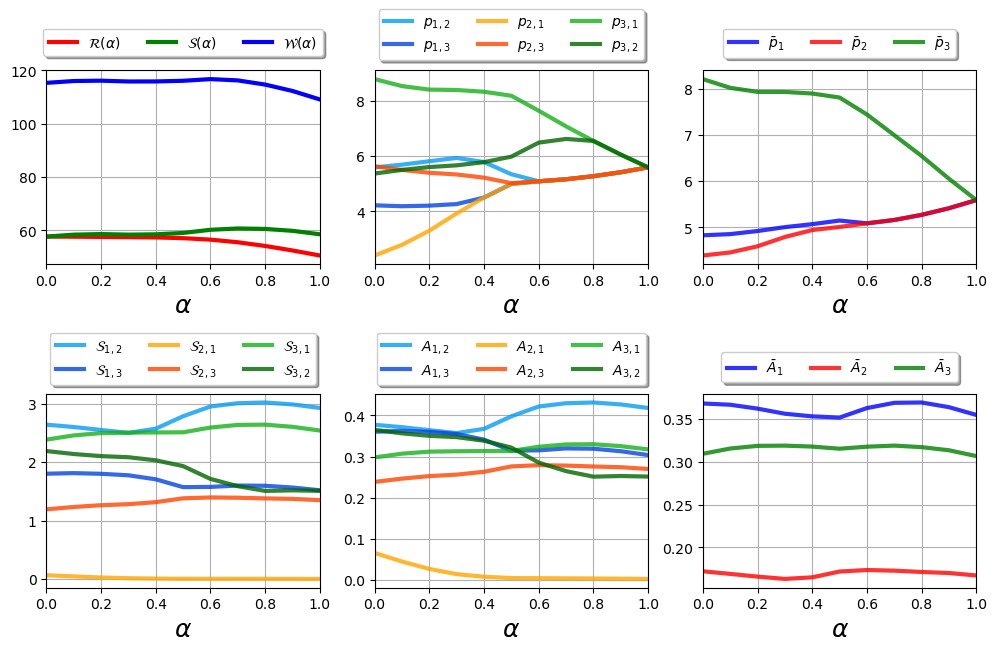

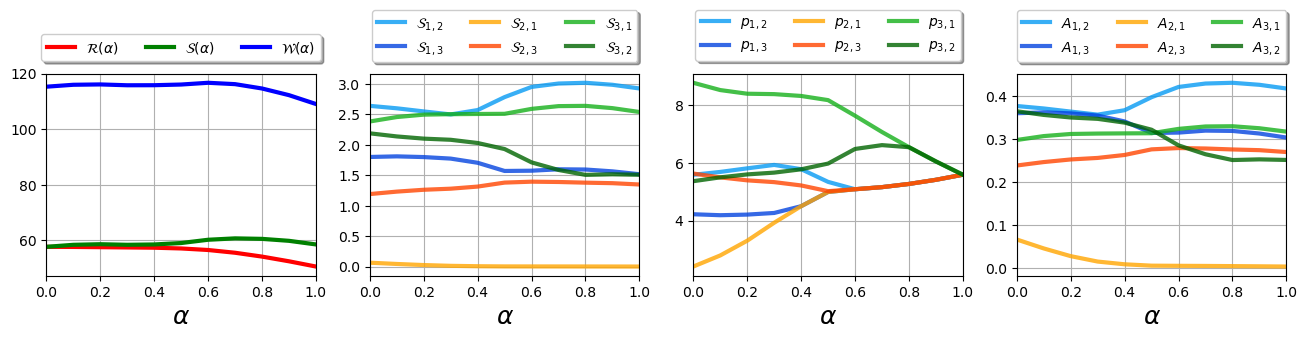

In [110]:
revenue_list, total_surplus_list, surplus_list, p_list, a_list, q_list = simulator(param['market'], fairness='Price', criteria='trip', alpha_list = [i/10 for i in range(11)])#[0, 0.2, 0.4, 0.6, 0.8, 1])

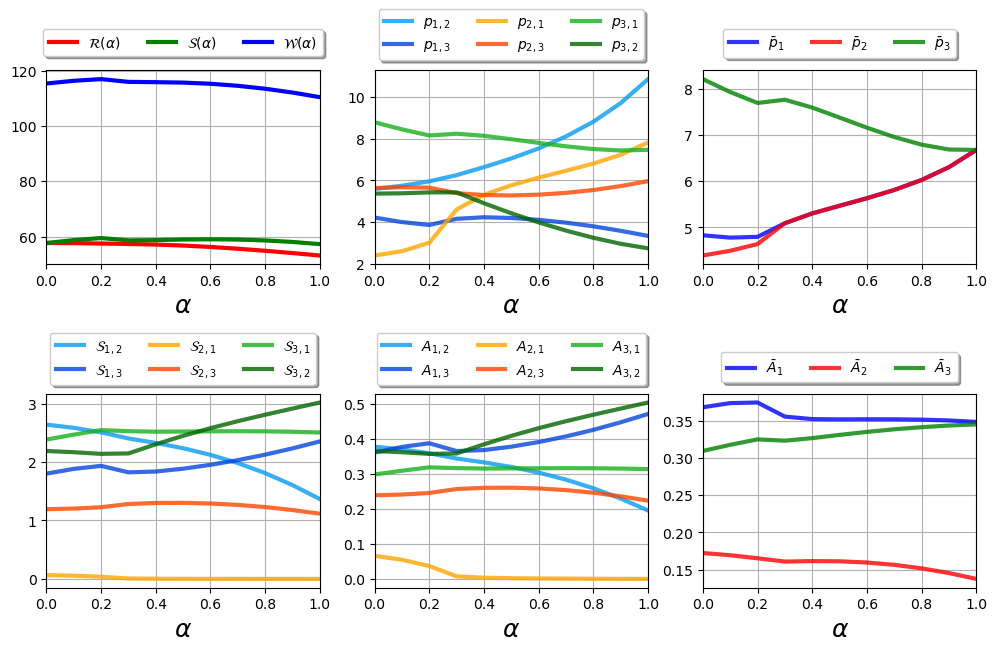

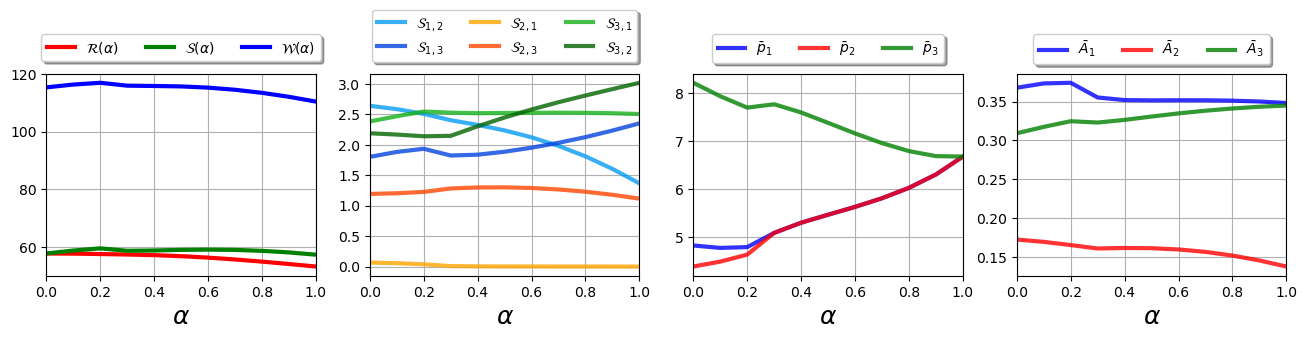

In [111]:
revenue_list, total_surplus_list, surplus_list, p_list, a_list, q_list = simulator(param['market'], fairness='Price', criteria='origin', alpha_list = [i/10 for i in range(11)])#[0, 0.2, 0.4, 0.6, 0.8, 1])

#### Trip-based Price Fairness

In [13]:
revenue_list, surplus_list, total_surplus_list, p_list, q_list, a_list = running_alg(param, 'Price', 'trip', alpha_list=[i/10 for i in range(11)])

Grid search < ipopt
rev at first round 57.67350056525122
Grid search < ipopt
rev at second round 57.67350056525122
Grid search < ipopt
rev at third round 57.67350056525122
alpah: 1.0
Grid search < ipopt
rev at first round 50.578077185212656
Grid search < ipopt
rev at second round 50.578077185212656
Grid search < ipopt
rev at third round 50.578077185212656
alpah: 0.9
Grid search < ipopt
rev at first round 52.46649531680243
Grid search < ipopt
rev at second round 52.46649531680243
Grid search < ipopt
rev at third round 52.46649531680243
alpah: 0.8
Grid search < ipopt
rev at first round 54.15877969589364
Grid search < ipopt
rev at second round 54.15877969589364
Grid search < ipopt
rev at third round 54.15877969589364
alpah: 0.7
Grid search < ipopt
rev at first round 55.54326846051294
Grid search < ipopt
rev at second round 55.54326846051294
Grid search < ipopt
rev at third round 55.54326846051294
alpah: 0.6
Grid search < ipopt
rev at first round 56.53388952646278
Grid search < ipopt
rev a

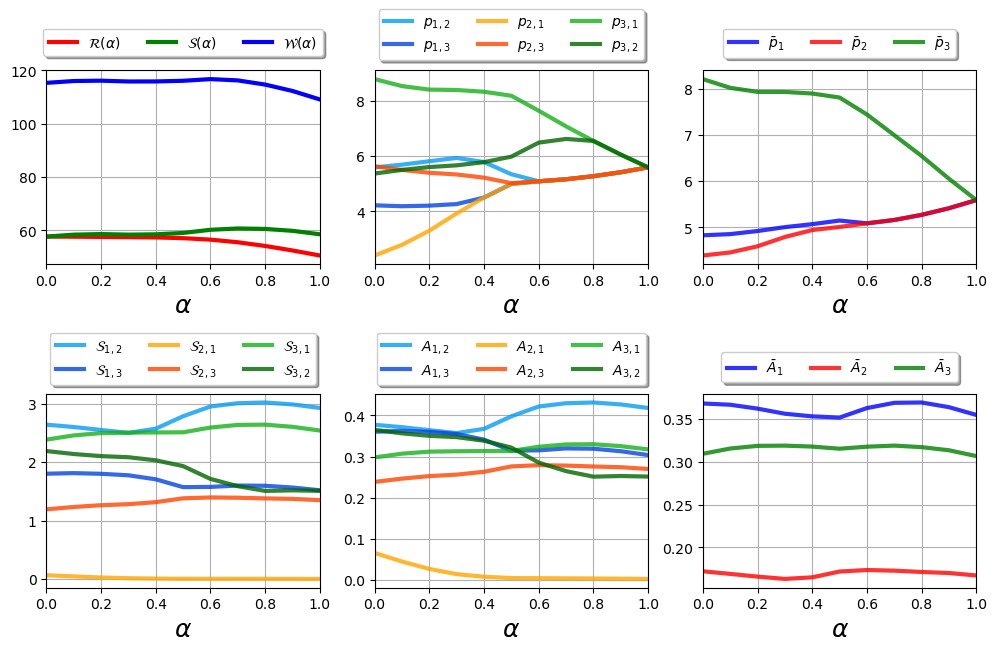

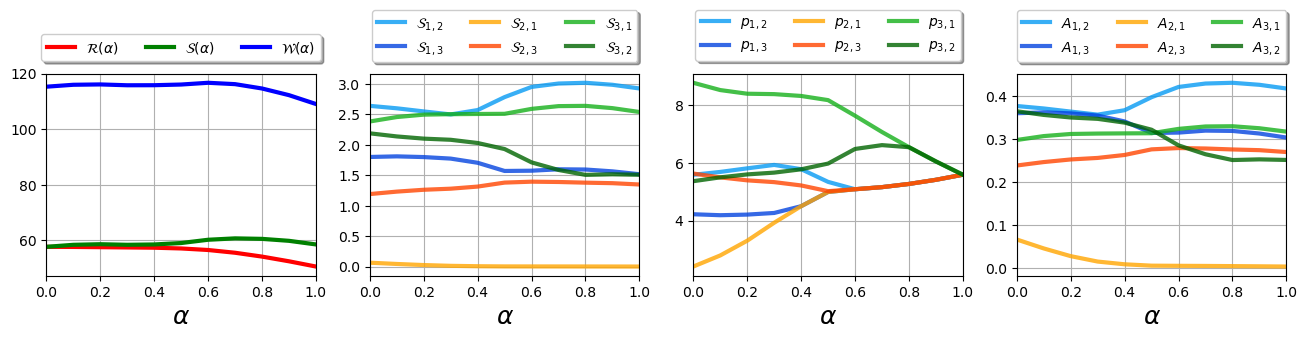

In [113]:
revenue_list, total_surplus_list, surplus_list, p_list, a_list, q_list = simulator(param['market'], fairness='Price', criteria='trip', alpha_list = [i/10 for i in range(11)])#[0, 0.2, 0.4, 0.6, 0.8, 1])

#### Origin-based Price Fairness

In [15]:
revenue_list, surplus_list, total_surplus_list, p_list, q_list, a_list = running_alg(param, 'Price', 'origin', alpha_list=[i/10 for i in range(11)])#[0, 0.2, 0.4, 0.6, 0.8, 1])

Grid search < ipopt
rev at first round 57.67350056525121
Grid search < ipopt
rev at second round 57.67350056525121
Grid search < ipopt
rev at third round 57.67350056525121
alpah: 1.0
Grid search < ipopt
rev at first round 53.14878258503572
Grid search < ipopt
rev at second round 53.14878258503572
Grid search < ipopt
rev at third round 53.14878258503572
alpah: 0.9
Grid search < ipopt
rev at first round 54.02299247567571
Grid search < ipopt
rev at second round 54.02299247567571
Grid search < ipopt
rev at third round 54.02299247567571
alpah: 0.8
Grid search < ipopt
rev at first round 54.853927789870184
Grid search < ipopt
rev at second round 54.853927789870184
Grid search < ipopt
rev at third round 54.853927789870184
alpah: 0.7
Grid search < ipopt
rev at first round 55.60341248360563
Grid search < ipopt
rev at second round 55.60341248360563
Grid search < ipopt
rev at third round 55.60341248360563
alpah: 0.6
Grid search < ipopt
rev at first round 56.24181643910725
Grid search < ipopt
rev a

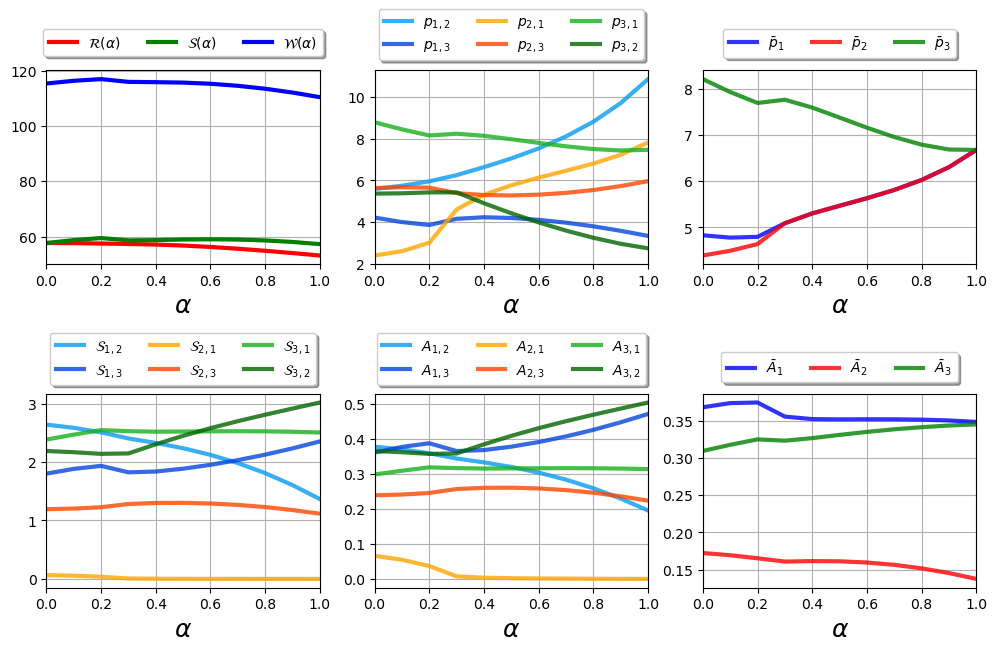

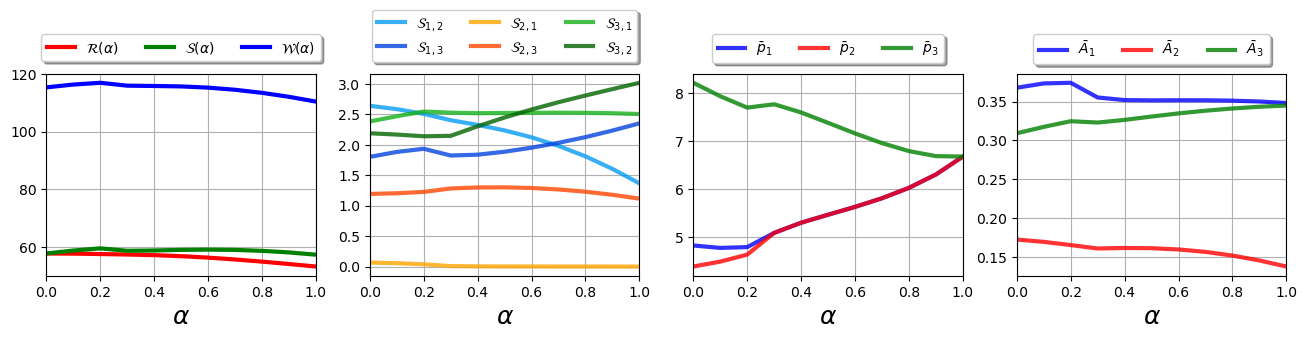

In [114]:
revenue_list, total_surplus_list, surplus_list, p_list, a_list, q_list = simulator(param['market'], fairness='Price', criteria='origin', alpha_list = [i/10 for i in range(11)])#[0, 0.2, 0.4, 0.6, 0.8, 1])

#### Trip-based Access Fairness

In [17]:
revenue_list, surplus_list, total_surplus_list, p_list, q_list, a_list = running_alg(param, 'Access', 'trip', alpha_list=[i/10 for i in range(11)])#[0, 0.2, 0.4, 0.6, 0.8, 1])

Grid search < ipopt
rev at first round 57.67350056412528
Grid search < ipopt
rev at second round 57.67350056412528
Grid search < ipopt
rev at third round 57.67350056412528
alpah: 1.0
Grid search < ipopt
rev at first round 4.6310580453039016e-05
Grid search < ipopt
rev at second round 4.6310580453039016e-05
Grid search < ipopt
rev at third round 4.6310580453039016e-05
alpah: 0.9
Grid search < ipopt
rev at first round 23.797287009812127
Grid search < ipopt
rev at second round 23.797287009812127
Grid search < ipopt
rev at third round 23.797287009812127
alpah: 0.8
Grid search < ipopt
rev at first round 36.42590541293349
Grid search < ipopt
rev at second round 36.42590541293349
Grid search < ipopt
rev at third round 36.42590541293349
alpah: 0.7
Grid search < ipopt
rev at first round 44.812666538341134
Grid search < ipopt
rev at second round 44.812666538341134
rev at third round 44.812666538341134
alpah: 0.6
Grid search < ipopt
rev at first round 50.52927861770275
Grid search < ipopt
rev at 

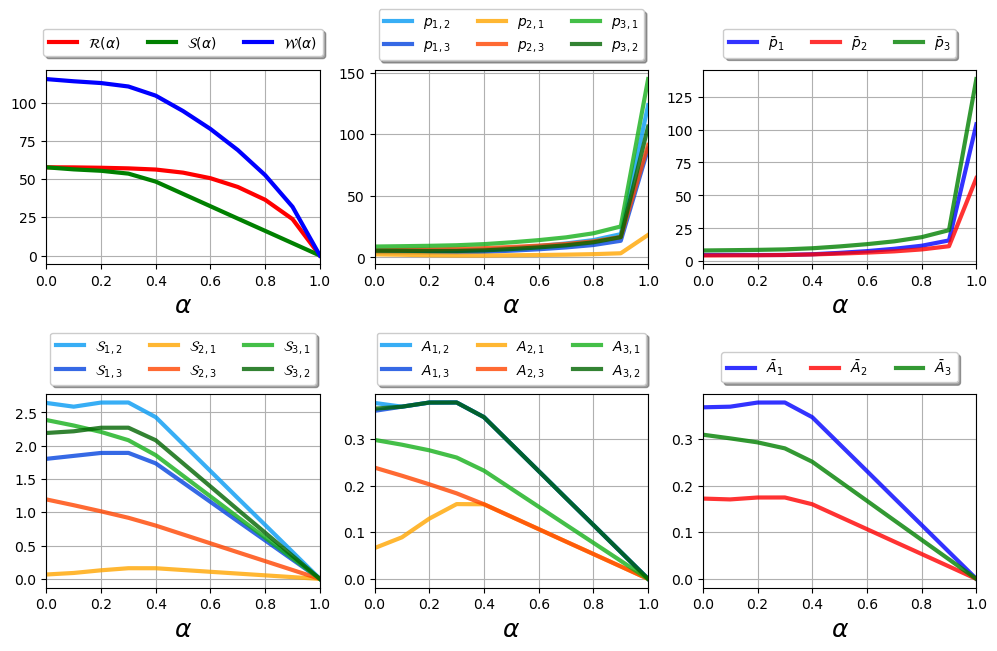

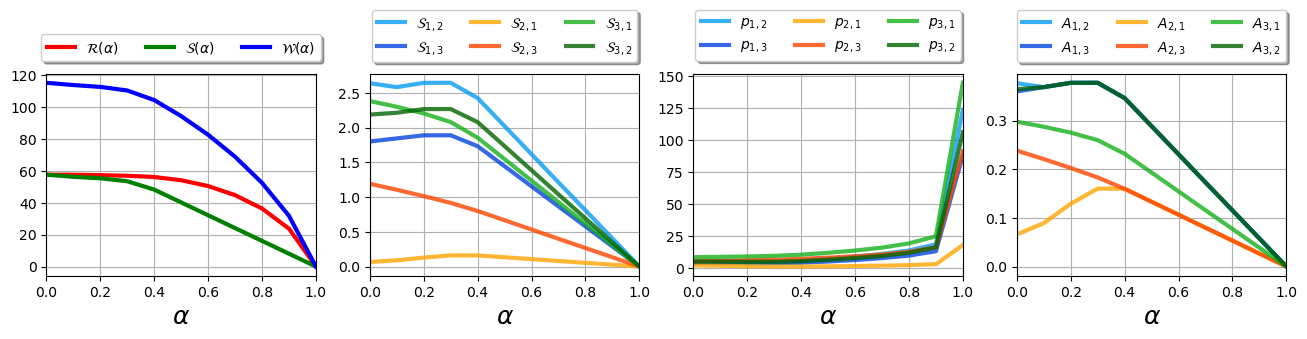

In [115]:
revenue_list, total_surplus_list, surplus_list, p_list, a_list, q_list = simulator(param['market'], fairness='Access', criteria='trip', alpha_list = [i/10 for i in range(11)])#[0, 0.2, 0.4, 0.6, 0.8, 1])

#### Origin-based Access Fairness

In [19]:
revenue_list, surplus_list, total_surplus_list, p_list, q_list, a_list = running_alg(param, 'Access', 'origin', alpha_list=[i/10 for i in range(11)])

Grid search < ipopt
rev at first round 57.67350056525121
Grid search < ipopt
rev at second round 57.67350056525121
Grid search < ipopt
rev at third round 57.67350056525121
alpah: 1.0
rev at first round 48.5397522312301
rev at second round 48.5397522312301
rev at third round 48.5397522312301
alpah: 0.9
Grid search < ipopt
rev at first round 50.779446073449925
Grid search < ipopt
rev at second round 50.779446073449925
Grid search < ipopt
rev at third round 50.779446073449925
alpah: 0.8
Grid search < ipopt
rev at first round 52.62124130586698
Grid search < ipopt
rev at second round 52.62124130586698
Grid search < ipopt
rev at third round 52.62124130586698
alpah: 0.7
Grid search < ipopt
rev at first round 54.098120177769374
Grid search < ipopt
rev at second round 54.098120177769374
Grid search < ipopt
rev at third round 54.098120177769374
alpah: 0.6
Grid search < ipopt
rev at first round 55.23956216496339
Grid search < ipopt
rev at second round 55.23956216496339
Grid search < ipopt
rev at 

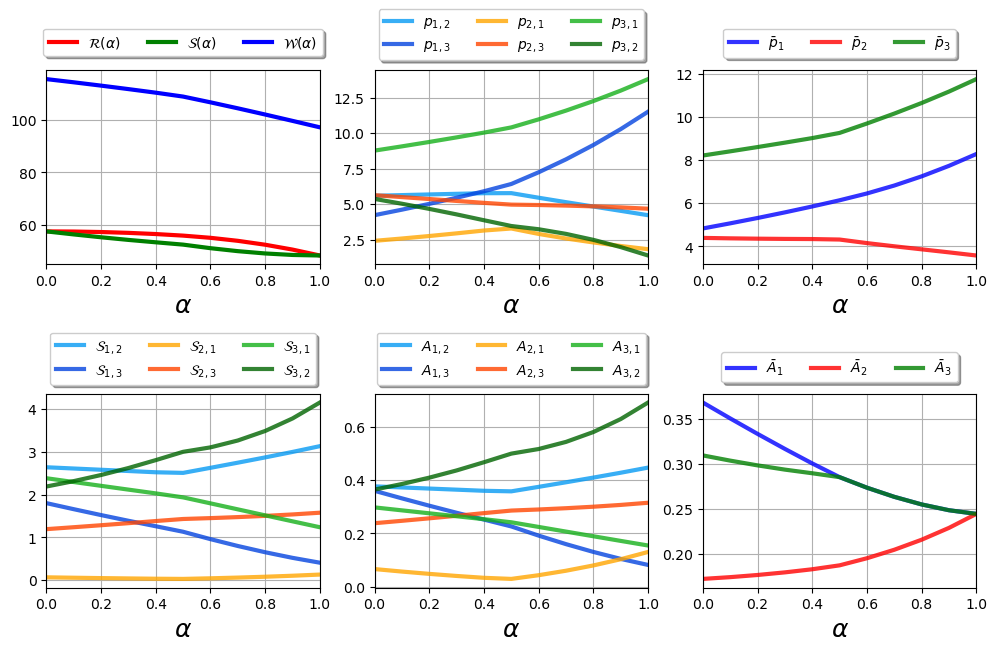

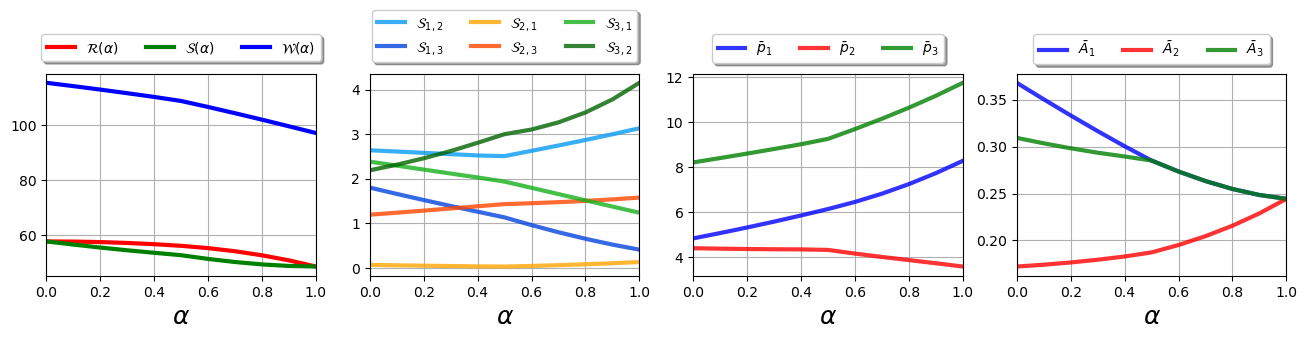

In [116]:
revenue_list, total_surplus_list, surplus_list, p_list, a_list, q_list = simulator(param['market'], fairness='Access', criteria='origin', alpha_list = [i/10 for i in range(11)])

### Compare Grid Search and Algorithm

In [21]:
def compare_n_3(opt, alg, fairness, criteria, d=None):
  d = {(i,j): 1 for i in [1,2,3] for j in [1,2,3]} if d == None else d
  revenue_list, total_surplus_list, surplus_list, price_list, access_list, weight_list = opt['rev'], opt['ts'], opt['s'], opt['p'], opt['a'], opt['w']
  rev_alg, ts_alg, sur_alg, p_alg, a_alg, w_alg = alg['rev'], alg['ts'], alg['s'], alg['p'], alg['a'], alg['w']

  if fairness == 'Price':
    rev_alg = rev_alg['lb']

  fig, axs = plt.subplots(1, 3)
  fig.set_figheight(3.5)
  fig.set_figwidth(18)

  line1 = (0, (3, 1, 1, 1))#(0, (1, 1))
  line2 = (0, (1, 1))

  n_iter = len(revenue_list)
  iter_list = [i/(n_iter-1) for i in range(n_iter)] if n_iter != 1 else [0]
  axs[0].plot(iter_list, revenue_list, color='r', label = r'$\mathcal{R}(\alpha)$', linewidth=3.0)
  if fairness == 'Price':
    axs[0].plot(iter_list, rev_alg, color='r', linewidth=3.0, label = r'$\hat{\mathcal{R}}(\alpha)$', linestyle = line1)
  else:
    axs[0].plot(iter_list, rev_alg['ub'], color='r', linewidth=3.0, label = r'$\hat{\mathcal{R}}_{ub}(\alpha)$', linestyle = line2)
    axs[0].plot(iter_list, rev_alg['lb'], color='r', linewidth=3.0, label = r'$\hat{\mathcal{R}}_{lb}(\alpha)$', linestyle = line1)
    rev_alg = rev_alg['lb']

  axs[0].plot(iter_list, total_surplus_list, color='g', label = r'$\mathcal{S}(\alpha)$', linewidth=3.0)
  axs[0].plot(iter_list, ts_alg, color='g', linewidth=3.0, label = r'$\hat{\mathcal{S}}(\alpha)$', linestyle = line1)

  axs[0].plot(iter_list, [revenue_list[i] + total_surplus_list[i] for i in range(n_iter)], color='b', label = r'$\mathcal{W}(\alpha)$', linewidth=3.0)
  axs[0].plot(iter_list, [rev_alg[i] + ts_alg[i] for i in range(n_iter)], color='b', label = r'$\hat{\mathcal{W}}(\alpha)$', linewidth=3.0, linestyle = line1)

  level = 0.8
  c = ['#069AF3', '#0343DF', '#FFA500', '#FF4500', '#15B01A', '#006400']
  index = [(1,2), (1,3), (2,1), (2,3), (3,1), (3,2)]
  for i in range(6):
    if fairness == 'Price' and criteria == 'trip':
      axs[1].plot(iter_list, [p[index[i]]/d[index[i]] for p in price_list], label=r'$p_{%s}$' %str(index[i])[1:-1], linewidth=3.0, color=c[i], alpha=level)
      axs[2].plot(iter_list, [p[index[i]]/d[index[i]] for p in p_alg], label=r'$\hat{p}_{%s}$' %str(index[i])[1:-1], linewidth=3.0, color=c[i], alpha=level, linestyle = line1)
    elif fairness == 'Access' and criteria == 'trip':
      axs[1].plot(iter_list, [a[index[i]] for a in access_list], label=r'$A_{%s}$' %str(index[i])[1:-1], linewidth=3.0, color=c[i], alpha=level)
      axs[2].plot(iter_list, [a[index[i]] for a in a_alg], label=r'$\hat{A}_{%s}$' %str(index[i])[1:-1], linewidth=3.0, color=c[i], alpha=level, linestyle = line1)

  c = [0, '#0343DF', '#FF4500', '#006400']
  for i in range(1,4):
    if fairness == 'Price' and criteria == 'origin':
      axs[1].plot(iter_list, [p[i] for p in weight_list['p_i']], label=r'$p_{%s}$' %str(i), linewidth=3.0, color=c[i], alpha=level)
      axs[2].plot(iter_list, [p[i] for p in w_alg['p_i']], label=r'$\hat{p}_{%s}$' %str(i), linewidth=3.0, color=c[i], alpha=level, linestyle = line1)
    elif fairness == 'Access' and criteria == 'origin':
      axs[1].plot(iter_list, [a[i] for a in weight_list['a_i']], label=r'$A_{%s}$' %str(i), linewidth=3.0, color=c[i], alpha=level)
      axs[2].plot(iter_list, [a[i] for a in w_alg['a_i']], label=r'$\hat{A}_{%s}$' %str(i), linewidth=3.0, color=c[i], alpha=level, linestyle = line1)


  for j in range(3):
    axs[j].set_xlim([0, 1])
    axs[j].grid()

  for i in range(3):
      box = axs[i].get_position()
      axs[i].set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

  shadow = True
  if fairness == 'Price':
    axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), fancybox=True, shadow=shadow, ncol=3, prop={"size":14})
  else:
    axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.55), fancybox=True, shadow=shadow, ncol=3, prop={"size":14})

  if criteria == 'trip':
    if fairness == 'Price':
      axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.38), fancybox=True, shadow=shadow, ncol=3, prop={"size":14})
      axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.42), fancybox=True, shadow=shadow, ncol=3, prop={"size":14})
    else:
      axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.38), fancybox=True, shadow=shadow, ncol=3, prop={"size":14})
      axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.44), fancybox=True, shadow=shadow, ncol=3, prop={"size":14})
  else:
    if fairness == 'Price':
      axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), fancybox=True, shadow=shadow, ncol=3, prop={"size":14})
      axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.27), fancybox=True, shadow=shadow, ncol=3, prop={"size":14})
    else:
      axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), fancybox=True, shadow=shadow, ncol=3, prop={"size":14})
      axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.27), fancybox=True, shadow=shadow, ncol=3, prop={"size":14})

  for ax in axs.flat:
    ax.set(xlabel=r'$\alpha$')
    ax.xaxis.label.set_fontsize(18) #28

  plt.show()

In [22]:
def opt_dict(market, fairness='Price', criteria='trip', alpha_list = [i/10 for i in range(11)]):
    revenue_list, surplus_list, total_surplus_list, p_list, a_list, q_list = [], [], [], [], [] ,[]
    weighted_a, weighted_p = [], []
    alpha_list = [a/10 for a in range(1,11)] if alpha_list == None else alpha_list
    for alpha in alpha_list:
        filename = f'{fairness}_{criteria}_{alpha}.pkl' if alpha != 0 else 'Opt.pkl'
        with open(os.path.join(save_path, filename), 'rb') as f:
            result = pickle.load(f)
        revenue_list.append(result['rev'])
        surplus_list.append(result['sur_dict']['s'])
        total_surplus_list.append(result['sur_dict']['ts'])
        p_list.append(result['opt_price'])
        q_list.append(result['org_q'])
        a_list.append(result['opt_access'])

        a_i = {k: sum([market[k,j] * result['opt_access'][k,j] if k != j else 0 for j in L])/sum([market[k,j] if k != j else 0 for j in L]) for k in L}
        weighted_a.append(a_i)
        p_i = {k: sum([market[k,j] * result['opt_price'][k,j] if k != j else 0 for j in L])/sum([market[k,j] if k != j else 0 for j in L]) for k in L}
        weighted_p.append(p_i)
    weighted_opt = {'a_i': weighted_a, 'p_i': weighted_p}
    opt = {'rev': revenue_list, 'ts': total_surplus_list, 's': surplus_list, 'p': p_list, 'q': q_list, 'a': a_list, 'w': weighted_opt}
    return opt

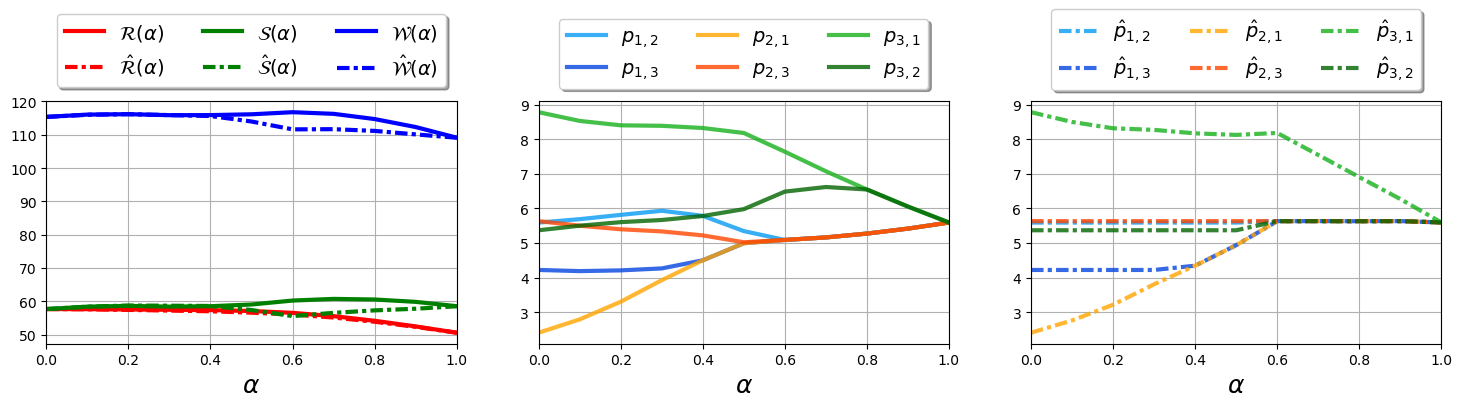

In [23]:
fairness = 'Price'
criteria = 'trip'
opt = opt_dict(market, fairness, criteria)
filename = os.path.join(save_path_ipopt, f'{fairness}_{criteria}.pkl')
with open(filename, 'rb') as f:
    result = pickle.load(f)
alg = result['alg']
compare_n_3(opt, alg, fairness=fairness, criteria = criteria)

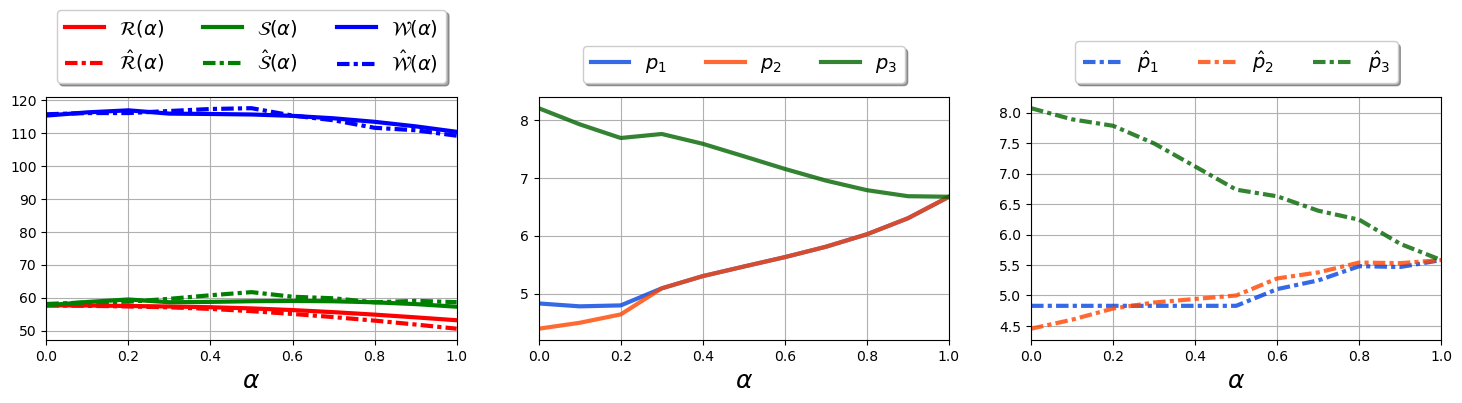

In [117]:
fairness = 'Price'
criteria = 'origin'
opt = opt_dict(market, fairness, criteria)
filename = os.path.join(save_path_ipopt, f'{fairness}_{criteria}.pkl')
with open(filename, 'rb') as f:
    result = pickle.load(f)
alg = result['alg']
compare_n_3(opt, alg, fairness=fairness, criteria = criteria)

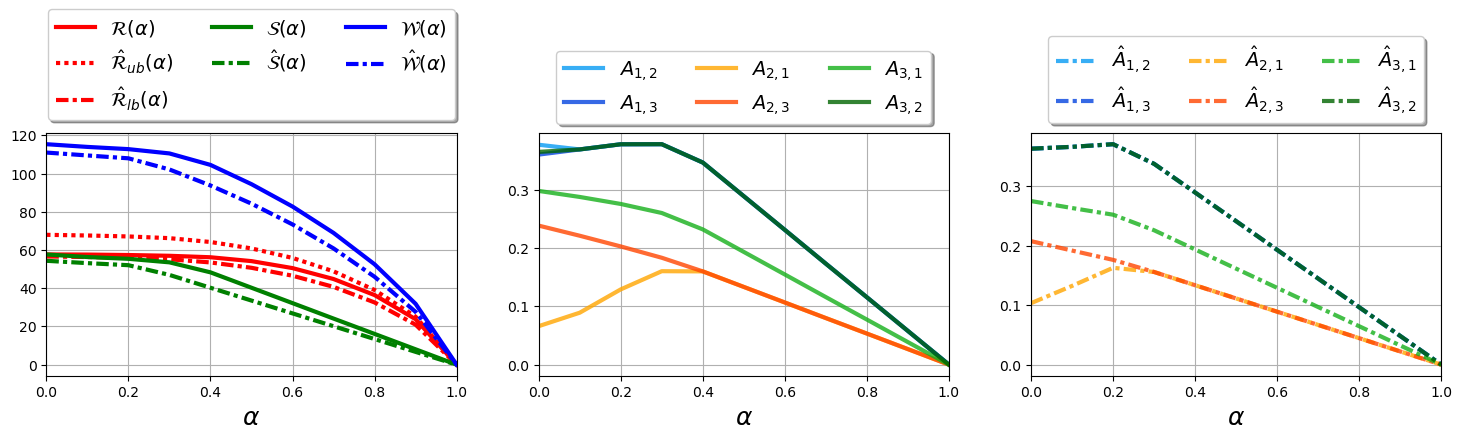

In [118]:
fairness = 'Access'
criteria = 'trip'
opt = opt_dict(market, fairness, criteria)
filename = os.path.join(save_path_ipopt, f'{fairness}_{criteria}.pkl')
with open(filename, 'rb') as f:
    result = pickle.load(f)
alg = result['alg']
compare_n_3(opt, alg, fairness=fairness, criteria = criteria)

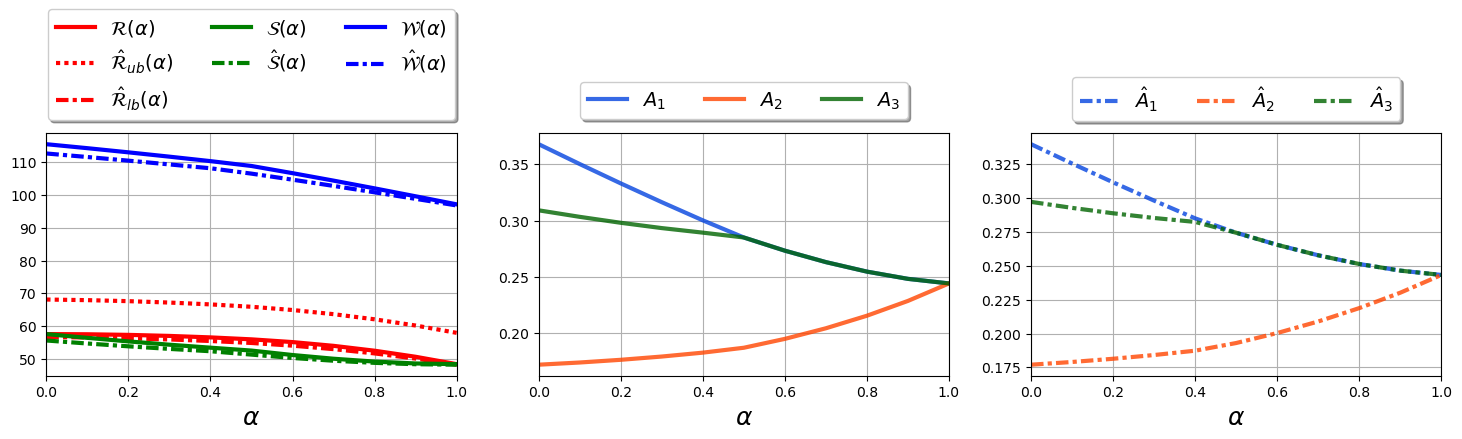

In [26]:
fairness = 'Access'
criteria = 'origin'
opt = opt_dict(market, fairness, criteria)
filename = os.path.join(save_path_ipopt, f'{fairness}_{criteria}.pkl')
with open(filename, 'rb') as f:
    result = pickle.load(f)
alg = result['alg']
compare_n_3(opt, alg, fairness=fairness, criteria = criteria)